In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("../data/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
#Dilakukan copy data untuk mengganti zero values dengan NaN. Lalu data copy yang akan digunakan untuk proses data selanjutnya.

df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [38]:
df_copy['Glucose'] = df_copy['Glucose'].fillna(df_copy['Glucose'].mean())
df_copy['BloodPressure'] = df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean())
df_copy['SkinThickness'] = df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median())
df_copy['Insulin'] = df_copy['Insulin'].fillna(df_copy['Insulin'].median())
df_copy['BMI'] = df_copy['BMI'].fillna(df_copy['BMI'].median())

In [39]:
## Melihat jumlah sampel data dan atribut
df_copy.shape

(768, 9)

In [40]:
## Menjumlah missing value.
def missing_cols(df_copy):
    ''' Prints out columns with its amount of missing values'''
    total = 0 
    for col in df_copy.columns:
        missing_vals = df_copy[col].isnull().sum()
        total += missing_vals
        if missing_vals != 0:
            print(f"{col} => {df_copy[col].isnull().sum()}")
            
    if total == 0:
        print("no missing values left")

missing_cols(df_copy)

no missing values left


In [41]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = df_copy.Outcome

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Membuat model SVM dengan kernel linear
model = SVC(kernel='linear')

# Melatih model dengan data training
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:
# Memprediksi data test
y_pred = model.predict(X_test)

# Menghitung akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 75.32%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154




Confusion Matrix:
 [[82 17]
 [21 34]]


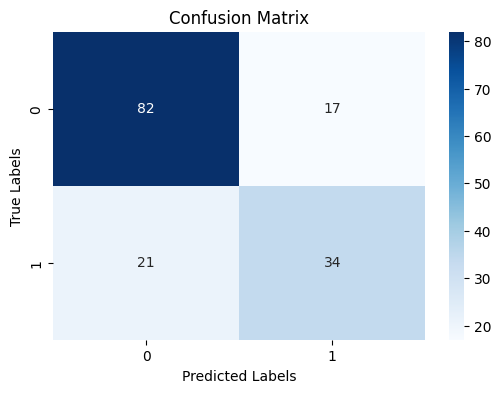

In [45]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


# Visualisasi confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

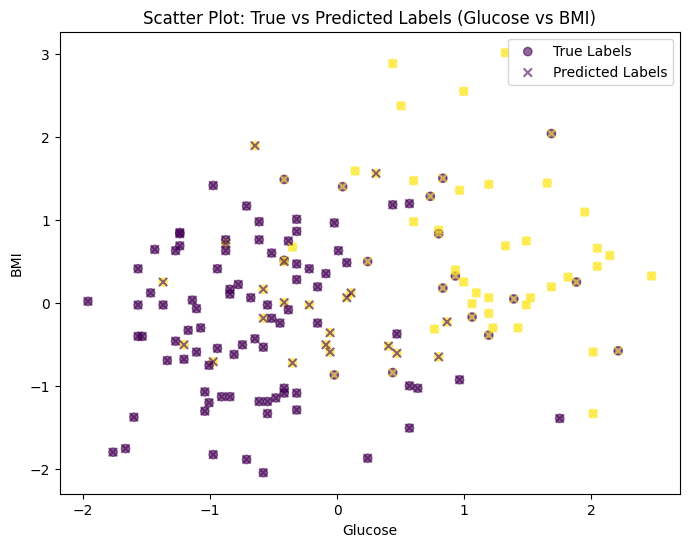

In [46]:
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

plt.figure(figsize=(8,6))

# Plot berdasarkan label asli
plt.scatter(X_test['Glucose'], X_test['BMI'],
            c=y_test_encoded, cmap='viridis', marker='o', label='True Labels', alpha=0.6)

# Plot berdasarkan label prediksi
plt.scatter(X_test['Glucose'], X_test['BMI'],
            c=y_pred_encoded, cmap='viridis', marker='x', label='Predicted Labels', alpha=0.6)

plt.title("Scatter Plot: True vs Predicted Labels (Glucose vs BMI)")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.legend()
plt.show()

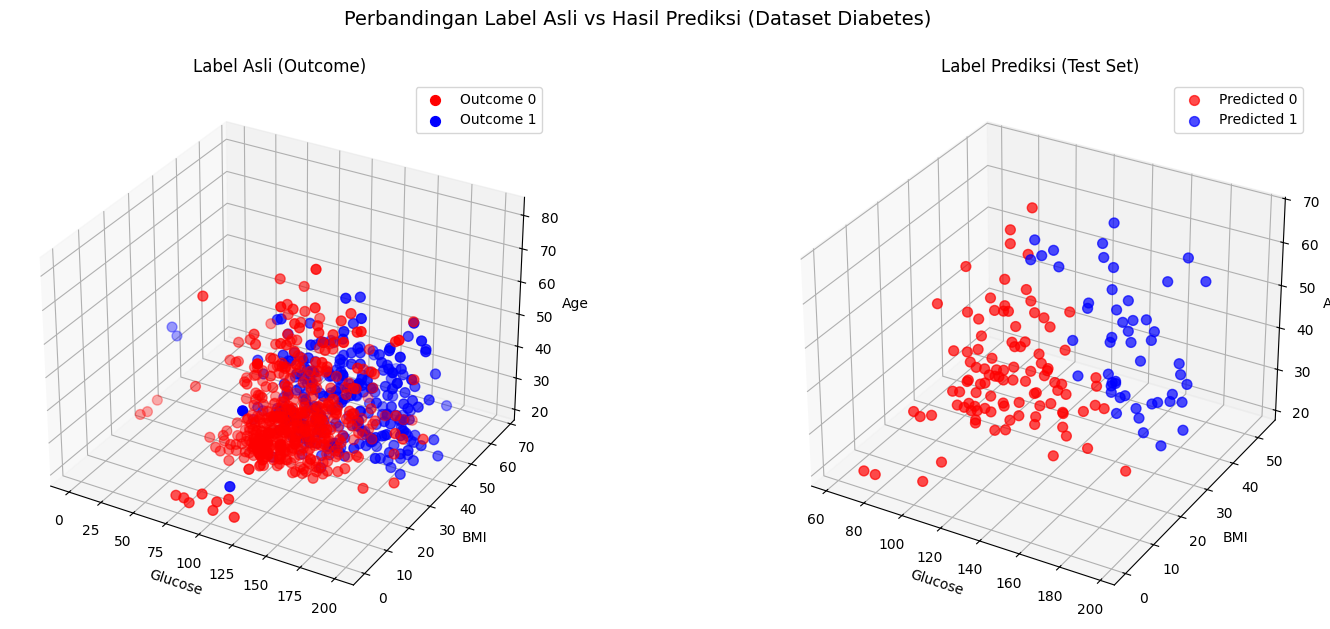

In [47]:
# Encode label (Outcome: 0/1)
le = LabelEncoder()
df['OutcomeEncoded'] = le.fit_transform(df['Outcome'])

# Warna & label untuk tiap kelas
colors = ['r', 'b']  # 0 = red, 1 = blue
labels = le.classes_ # biasanya [0, 1]

fig = plt.figure(figsize=(18, 7))

# --- Plot 1: Label Asli ---
ax1 = fig.add_subplot(121, projection='3d')
for i, outcome_label in enumerate(labels):
    subset_true = df[df['OutcomeEncoded'] == i]
    ax1.scatter(
        subset_true['Glucose'],
        subset_true['BMI'],
        subset_true['Age'],
        color=colors[i],
        label=f"Outcome {outcome_label}",
        s=50
    )

ax1.set_title('Label Asli (Outcome)')
ax1.set_xlabel('Glucose')
ax1.set_ylabel('BMI')
ax1.set_zlabel('Age')
ax1.legend()


# --- Plot 2: Label Prediksi (Test Set) ---
ax2 = fig.add_subplot(122, projection='3d')

# Buat kolom baru untuk label prediksi yang sudah di-encode
df.loc[X_test.index, 'PredictedOutcome'] = le.transform(y_pred)

for i, outcome_label in enumerate(labels):
    subset_pred = df.loc[X_test.index]
    subset_pred = subset_pred[subset_pred['PredictedOutcome'] == i]
    
    if not subset_pred.empty:
        ax2.scatter(
            subset_pred['Glucose'],
            subset_pred['BMI'],
            subset_pred['Age'],
            color=colors[i],
            label=f"Predicted {outcome_label}",
            s=50,
            alpha=0.7
        )

ax2.set_title('Label Prediksi (Test Set)')
ax2.set_xlabel('Glucose')
ax2.set_ylabel('BMI')
ax2.set_zlabel('Age')
ax2.legend()

plt.suptitle('Perbandingan Label Asli vs Hasil Prediksi (Dataset Diabetes)', fontsize=14)
plt.show()